In [ ]:
# This is what I've been able to do so far, let me know what you all want to use as well as
# let me know what else you want me to try, thanks team!

In [2]:
import requests
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import seaborn as sns

In [3]:
csv_path = "clean_data/Combined_Census_Cov19.csv"
clean_df = pd.read_csv(csv_path, encoding="utf-8")
clean_df.head(10)

,Unnamed: 0,County,State,Mean Household Income,Population,Median Age,Per Capita Income,Poverty Count,Unemployment Count,Population_2018,...,Total_age65plus,Male_age65plus,Female_age65plus,Total_age85plusr,Male_age85plusr,Female_age85plusr,ICU_Beds,Aggregate_Transit_Score,cases,deaths
0,0.0,Washington,MS,30834.0,47086.0,36.9,19884.0,15496.0,3041.0,45063.0,...,7140.0,2952.0,4188.0,740.0,201.0,539.0,22.0,0.0,5440.0,191.0
1,1.0,Perry,MS,39007.0,12028.0,40.9,21611.0,2231.0,337.0,11931.0,...,2179.0,970.0,1209.0,227.0,80.0,147.0,0.0,0.0,1769.0,86.0
2,2.0,Choctaw,MS,37203.0,8321.0,44.0,20589.0,1888.0,301.0,8278.0,...,1785.0,769.0,1016.0,203.0,72.0,131.0,0.0,0.0,1067.0,83.0
3,3.0,Itawamba,MS,40510.0,23480.0,40.0,20629.0,3428.0,414.0,23517.0,...,4152.0,1805.0,2347.0,481.0,169.0,312.0,0.0,0.0,2934.0,217.0
4,4.0,Carroll,MS,43060.0,10129.0,47.0,22567.0,1477.0,377.0,9911.0,...,2348.0,1123.0,1225.0,244.0,94.0,150.0,0.0,0.0,3558.0,209.0
5,5.0,Grenada,MS,36877.0,21278.0,39.8,21668.0,5090.0,617.0,21055.0,...,3744.0,1594.0,2150.0,399.0,125.0,274.0,5.0,0.0,2358.0,62.0
6,6.0,Jefferson,MS,20188.0,7346.0,39.3,13374.0,3418.0,152.0,7106.0,...,1199.0,490.0,709.0,171.0,54.0,117.0,0.0,0.0,1228.0,3.0
7,7.0,Greene,MS,49447.0,13714.0,39.1,17453.0,1475.0,394.0,13586.0,...,2020.0,926.0,1094.0,195.0,67.0,128.0,0.0,0.0,297.0,38.0
8,8.0,Marshall,MS,41572.0,35787.0,40.2,21352.0,6148.0,1006.0,35451.0,...,6214.0,2722.0,3492.0,605.0,192.0,413.0,0.0,0.0,3008.0,127.0
9,9.0,Quitman,MS,25510.0,7372.0,38.4,15353.0,2549.0,794.0,7051.0,...,1224.0,497.0,727.0,143.0,46.0,97.0,0.0,884260249.0,986.0,0.0


In [4]:
csv_path2 = "raw_covid_data/DS-C-19-STATES.csv"
clean2_df = pd.read_csv(csv_path2, encoding="utf-8")
clean2_df.head()

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,36380,399,10,734002,1.2863,0.4081,119,59687,73205,...,21,11064,6.4,1.0,26.6,66.0,0.36,0.39,0.25,03/19/20
1,Alabama,157566,12376,504,4908621,96.9221,0.4847,1533,42334,45219,...,101,7281,8.1,1.0,62.8,59.0,0.33,0.37,0.31,03/16/20
2,Arkansas,93701,4923,102,3038999,58.4030,0.4719,732,42566,42454,...,88,7408,7.1,0.0,60.4,56.2,0.34,0.37,0.30,03/17/20
3,Arizona,220612,14566,704,7378494,64.9550,0.4713,1559,43650,48055,...,83,6452,9.7,1.0,60.3,89.8,0.33,0.36,0.30,03/16/20
4,California,1339316,81795,3334,39937489,256.3727,0.4899,7338,62586,74205,...,359,7549,12.8,9.0,59.4,95.0,0.33,0.40,0.26,03/19/20


In [5]:
popd = clean2_df.sort_values(by=["Pop Density"])
popd.head()

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,36380,399,10,734002,1.2863,0.4081,119,59687,73205,...,21,11064,6.4,1.0,26.6,66.0,0.36,0.39,0.25,03/19/20
50,Wyoming,78611,1514,68,567025,5.8400,0.4360,102,60095,69900,...,29,8320,5.0,0.0,42.0,64.8,0.32,0.36,0.31,03/20/20
26,Montana,28950,471,16,1086759,7.4668,0.4667,165,47120,46609,...,56,8221,6.6,0.0,42.7,55.9,0.31,0.35,0.34,03/16/20
28,North Dakota,57731,1994,45,761723,11.0393,0.4533,238,54306,72597,...,39,9851,4.6,0.0,40.4,59.9,0.35,0.37,0.28,03/16/20
41,South Dakota,135063,9056,399,903027,11.9116,0.4495,152,50141,58624,...,57,8933,5.1,0.0,45.2,56.7,0.35,0.35,0.30,03/16/20


In [20]:
States = clean2_df["State"]
pDensity = clean2_df["Pop Density"]
Infected = clean2_df["Infected"]
plotting_df = pd.DataFrame({"States": States, "Population Density": pDensity, "Infected": Infected})
plotting_df.set_index("States").head()

,Population Density,Infected
States,,
Alaska,1.2863,399
Alabama,96.9221,12376
Arkansas,58.4030,4923
Arizona,64.9550,14566
California,256.3727,81795


In [ ]:
# Is there a correlation between population density in U.S. states to the number of people infected with COVID-19?

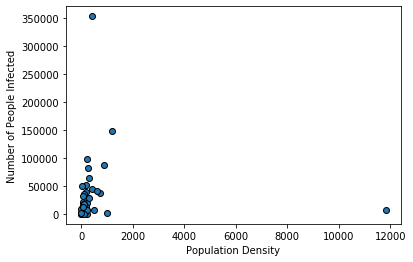

In [9]:
x = plotting_df["Population Density"]
y = plotting_df["Infected"]
plt.scatter(x, y, marker="o", edgecolor="black")
plt.xlabel("Population Density")
plt.ylabel("Number of People Infected")
plt.show()

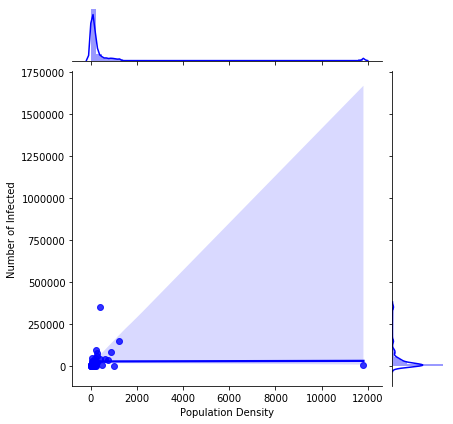

In [22]:
x = plotting_df["Population Density"]
y = plotting_df["Infected"]
ax = sns.jointplot(x=x, y=y, kind="reg", color="b")
ax.set_axis_labels("Population Density", "Number of Infected")


In [ ]:
# How about overall state population versus the number of people infected with COVID-19, is there a connection?
# Continue scrolling for more summary.

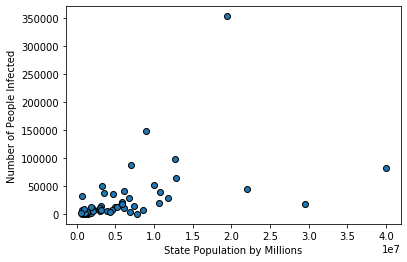

In [11]:
xx = clean2_df["Population"]
yy = clean2_df["Infected"]
plt.scatter(xx, yy, marker="o", edgecolor="black")
plt.xlim
plt.xlabel("State Population by Millions")
plt.ylabel("Number of People Infected")
plt.show()

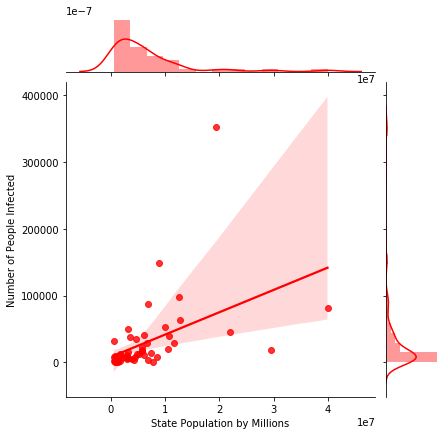

In [23]:
ax = sns.jointplot(x=xx, y=yy, kind="reg", color="r")
ax.set_axis_labels("State Population by Millions", "Number of People Infected")

In [ ]:
# I'm finding that higher population density does not equal more people infected with COVID-19!
# Also, states with an overall high population do seem to have more cases of people infected.
# Next, I'm going to compare states' number of airports with the number of people infected.

In [ ]:
# Is there a correlation between number or airports in U.S. States to the number of people infected with COVID-19?

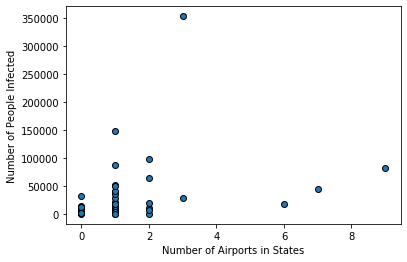

In [12]:
xxx = clean2_df["Med-Large Airports"]
yyy = clean2_df["Infected"]
plt.scatter(xxx, yyy, marker="o", edgecolor="black")
plt.xlim
plt.xlabel("Number of Airports in States")
plt.ylabel("Number of People Infected")
plt.show()

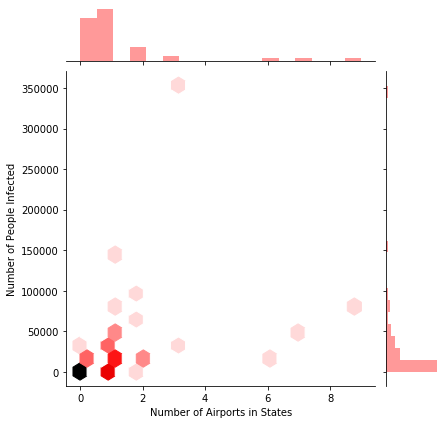

In [17]:
ax = sns.jointplot(x=xxx, y=yyy, kind="hex", color="r")
ax.set_axis_labels("Number of Airports in States", "Number of People Infected")

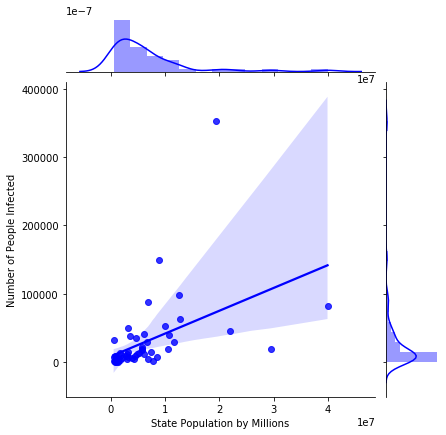

In [19]:
ax = sns.jointplot(x=xx, y=yy, kind="reg", color="b")
ax.set_axis_labels("State Population by Millions", "Number of People Infected")

In [ ]:
# Interestingly, there is a correlation between number of airports in a state to number of people infected.
# I do see that states with two airports or more--do have more cases of infected people. 

In [ ]:
# Thank you for your time!